# Analyzing results

We will use python and this jupyter notebook to plot and analyze the results obtained from the
fortran source code.

## Plotting results

For this we will use the `numpy` and `matplotlib.pyplot` packages

In [1]:
# Importing numpy and matplotlib
import numpy as np 
import matplotlib.pyplot as plt

Different styles are predefined that give different appearance to the plots. This one emulates the style of the figures you'll find on statisical analysis news site fivethirtyeight.com

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
# reading data stored in results_basic.dat

file_name = 'results_basic.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()
x_0 = all_data[0]
booles = all_data[1]
large_x0 = all_data[2]
monte_carlo = all_data[3]
monte_carlo_error = all_data[4]
# Each one of these is a numpy array that contains one of the columns in the results_basic.dat file.
# This will allow us to make operations on the extracted data

### Comparing Boole's quadrature and large $x_0$ approximation

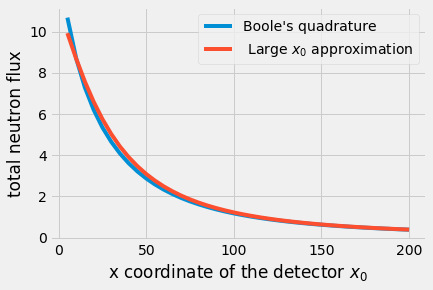

In [4]:
# The plot function can take two equally sized arrays,
# taking the first one as the x coordinates and the second one as the y coordinates
plt.plot(x_0, booles, label = "Boole's quadrature")
plt.plot(x_0, large_x0, label =' Large $x_0$ approximation')

plt.xlabel('x coordinate of the detector $x_0$')
plt.ylabel('total neutron flux')
# legend displays the labels given in each plot
plt.legend()
plt.show()

When are the Boole's quadrature and the large $x_0$ results similar and when are they different?

Where do the results start to diverge, and why? 

Provivde your answers in the cell bellow

#### Write your answer here!

In [5]:
# The large x_0 referrs to flux calculated far from the reactor, where the reactor can be
# treated as a point source. The Booles method, being more exact, will give different flux values when closer to 
# the reactor and begin to agree with the large x_0 approximation as distance from the reactor increases. 
# These two methods diverge closer to the reactor for this reason.

### Comparing Boole's quadrature and Monte Carlo integration

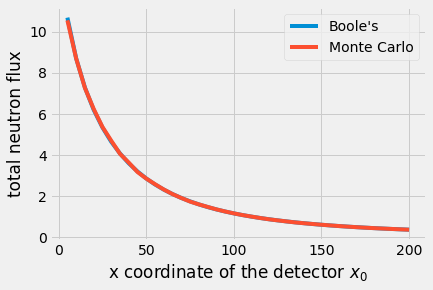

In [6]:
plt.plot(x_0, booles, label = "Boole's")
plt.plot(x_0, monte_carlo, label = 'Monte Carlo')
plt.xlabel('x coordinate of the detector $x_0$')
plt.ylabel('total neutron flux')
plt.legend()
plt.show()

Do you see any siginifant differences between both methods? To get a clearer picture let's plot their difference and compare it with the estimate of the statistical uncertainty

In [7]:
# Both the red and blue lines are on this plot, they are just over-lapping almost perfectly. Look closely. 
# There is virtually no visible differences between these methods on this scale, with these many sampling points. 

In [8]:
# Operations between arrays of the same size are applied element-wise
quadrature_difference = np.absolute(booles - monte_carlo)

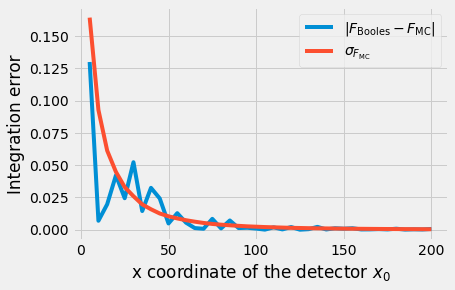

In [9]:
plt.plot(x_0, quadrature_difference, label = r'$|F_{\rm Booles} - F_{\rm MC}|$')
plt.plot(x_0, monte_carlo_error, label = r'$\sigma_{F_{\rm MC}}$')
plt.xlabel('x coordinate of the detector $x_0$')
plt.ylabel('Integration error')
plt.legend()
plt.show()

How does the difference between both methods compares to the estimate in the uncertainty?

Are they about the same size or is one significantly larger than the other?

Is the difference between the Boole's and Monte Carlo methods always smaller than the Monte Carlo error? Yes, No? 
Explain why in the cell bello

#### Give your answer here

## Advanced part of the project

### Reading the data from results file

In [10]:
# reading data stored in results_advanced.dat

# you should know how to do this by now.

# reading data stored in results_basic.dat

file_name = 'results_advanced.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()
radius = all_data[0]
box_booles = all_data[1]
hollow_booles = all_data[2]
hollow_monte_carlo = all_data[3]
mc_uncertainty = all_data[4]
# Each one of these is a numpy array that contains one of the columns in the results_basic.dat file.
# This will allow us to make operations on the extracted data

### Comparing Boole's and Monte Carlo when there's a hollow sphere inside the reactor

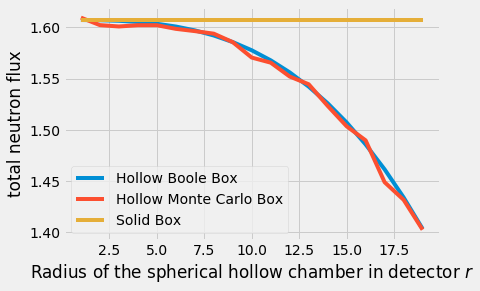

In [11]:
# plot Boole's result, Monte Carlo result and the Solid box with booles method
# as a function of the sphere's radius here


# you should know how to do this by now

plt.plot(radius, hollow_booles, label = "Hollow Boole Box")
plt.plot(radius, hollow_monte_carlo, label = 'Hollow Monte Carlo Box')
plt.plot(radius, box_booles, label = 'Solid Box')

#plt.axis([0, 20 , 0,0.50])

plt.xlabel('Radius of the spherical hollow chamber in detector $r$')
plt.ylabel('total neutron flux')
plt.legend()
plt.show()

Do the results of Boole's and Monte Carlo methods approach the solid reactor case when the radius of the hollow sphere get's small? Yes? No? Explain why in the cell bellow

In [12]:
# The flux, as calculated by the monte carlo method and the booles method, of the hollow
# box reactor approach the flux of the solid box reactor when the hollow region is reduced to 
# zero. We expect this result. 

#### Give your answer here

Finally, let's plot the difference between both methods and compare it with the error estimate 

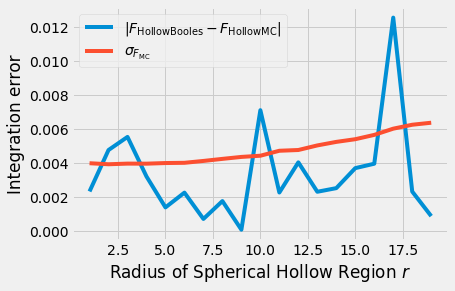

In [13]:
# you should know how to do this by now
quadrature_difference2 = np.absolute(hollow_booles - hollow_monte_carlo)

plt.plot(radius, quadrature_difference2, label = r'$|F_{\rm Hollow Booles} - F_{\rm Hollow MC}|$')
plt.plot(radius, mc_uncertainty, label = r'$\sigma_{F_{\rm MC}}$')
plt.xlabel('Radius of Spherical Hollow Region $r$')
plt.ylabel('Integration error')
plt.legend()
plt.show()

If your calculation is correct the error in the Monte Carlo method should increase as the hollow sphere's radius increases. Can you explain why?

#### Give your answer here

In [ ]:
# The error in the flux calculation of the monte carlo method increases with increasing spherical
# hollow region within the reactor. This is exaplained by the mechanics of how monte carlo works. 
# Essentially monte carlo works by tossing a high number of random points within the volume
# and using Basian probability to estimate the integral of the volume. When a large hollow region is introduced,
# more of these random points will be wasted on the empty space, thus reducing the number that falls within
# the region intended to be calculated. This reduced the accuracy of the method, and increases error.  